# Traffic Sign Classification

Autonomous cars must make real-time decision about perception of surroundings. CNN classifier accuracy must be close to 100%. One wrong classification can cause loss to life and property. I recently built a CNN from scratch to detect and classify traffic signs using open source data.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir("C:\Projects")

# Store data, labels in the list

In [2]:
data =[]
labels =[]
classes=43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Projects'

# Preprocess the images

In [4]:
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)

# Converting lists into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Save Labels & Data for future use

In [6]:
#os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

# Load data & Labels

In [7]:
data = np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train,X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Convert labels to onehot encoding

In [11]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

# Building the model

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape= X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(356, activation='relu'))
model.add(Dropout(rate=0.5))
#We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation="softmax"))

In [13]:
#Compilation of model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs =20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 70s 70ms/step - loss: 1.5672 - accuracy: 0.5974 - val_loss: 0.2758 - val_accuracy: 0.9246
Epoch 2/20
981/981 [==============================] - 69s 70ms/step - loss: 0.4723 - accuracy: 0.8618 - val_loss: 0.1269 - val_accuracy: 0.9686
Epoch 3/20
981/981 [==============================] - 69s 70ms/step - loss: 0.3181 - accuracy: 0.9073 - val_loss: 0.1804 - val_accuracy: 0.9519
Epoch 4/20
981/981 [==============================] - 72s 73ms/step - loss: 0.2918 - accuracy: 0.9180 - val_loss: 0.0966 - val_accuracy: 0.9748
Epoch 5/20
981/981 [==============================] - 74s 76ms/step - loss: 0.2444 - accuracy: 0.9312 - val_loss: 0.0945 - val_accuracy: 0.9728
Epoch 6/20
981/981 [==============================] - 72s 74ms/step - loss: 0.2316 - accuracy: 0.9366 - val_loss: 0.0712 - val_accuracy: 0.9820
Epoch 7/20
981/981 [==============================] - 70s 72ms/step - loss: 0.2196 - accuracy: 0.9429 - val_loss: 0.1036 - val_accuracy:

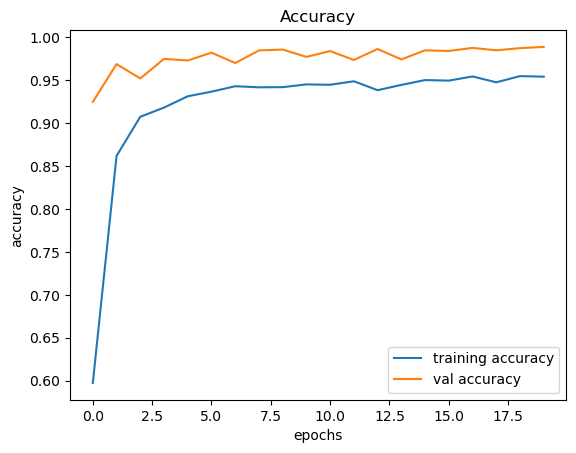

In [15]:
#Accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

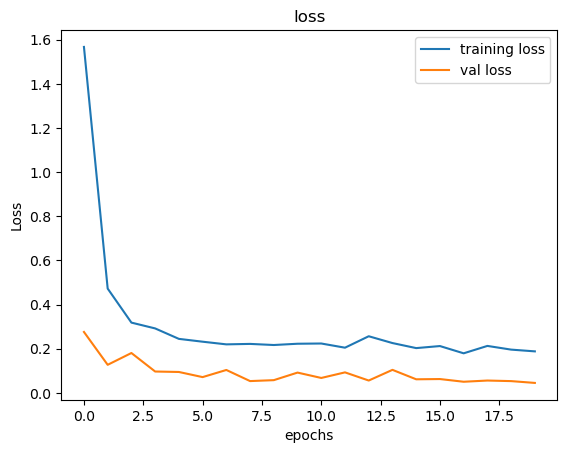

In [16]:
#loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Testing on test data

In [17]:
def testing(Testcsv):
    y_test = pd.read_csv(Testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test,label

In [18]:
X_test, label = testing("Test.csv")

In [19]:
predict_x = model.predict(X_test)
Y_pred = np.argmax(predict_x,axis=1)
Y_pred

395/395 [==============================] - 3s 7ms/step


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

# Accuray with test data

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,Y_pred))


0.9529691211401425


# Save the model

In [21]:
model.save("./keras model saved/TSR")

INFO:tensorflow:Assets written to: ./keras model saved/TSR\assets


INFO:tensorflow:Assets written to: ./keras model saved/TSR\assets


# Load the model

In [22]:
import os
os.chdir(r"C:\Projects")
from keras.models import load_model
model = load_model('./keras model saved/TSR/')


In [26]:
# Classes of traffic signs
classes = {
0:'Speed limit (5km/h)',
1:'Speed limit (15km/h)',
2:'Speed limit (30km/h)',
3:'Speed limit (40km/h)',
4:'Speed limit (50km/h)',
5:'Speed limit (60km/h)',
6:'Speed limit (70km/h)',
7:'speed limit (80km/h)',
8:'Dont Go straight or left',
9:'Dont Go straight or Right',
10:'Dont Go straight',
11:'Dont Go Left',
12:'Dont Go Left or Right',
13:'Dont Go Right',
14:'Dont overtake from Left',
15:'No Uturn',
16:'No Car',
17:'No horn',
18:'Speed limit (40km/h)',
19:'Speed limit (50km/h)',
20:'Go straight or right',
21:'Go straight',
22:'Go Left',
23:'Go Left or right',
24:'Go Right',
25:'keep Left',
26:'keep Right',
27:'Roundabout mandatory',
28:'watch out for cars',
29:'Horn',
30:'Bicycles crossing',
31:'Uturn',
32:'Road Divider',
33:'Traffic signals',
34:'Danger Ahead',
35:'Zebra Crossing',
36:'Bicycles crossing',
37:'Children crossing',
38:'Dangerous curve to the left',
39:'Dangerous curve to the right',
40:'Unknown1',
41:'Unknown2',
42:'Unknown3',
43:'Go right or straight',
44:'Go left or straight',
45:'Unknown4',
46:'ZigZag Curve',
47:'Train Crossing',
48:'Under Construction',
49:'Unknown5',
50:'Fences',
51:'Heavy Vehicle Accidents',
52:'Unknown6',
53:'Give Way',
54:'No stopping',
55:'No entry',
56:'Unknown7',
57:'Unknown8',
}

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    
    predict_x = model.predict(X_test)
    Y_pred = np.argmax(predict_x,axis=1)
    
    #Y_pred = model.predict_classes(X_test)
    return image,Y_pred
    

1/1 [==============================] - 0s 21ms/step
Prediction traffic sign is:  Traffic signals


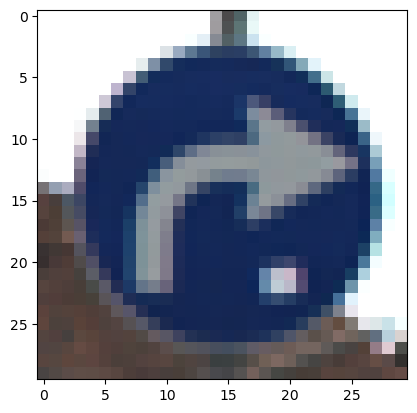

In [34]:
plot,prediction = test_on_img(r'C:\Projects\Test\00174.png')
s = [str(i)for i in prediction]
a = int("".join(s))
print("Prediction traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

#####################-----------End-------------------##################################